<a href="https://colab.research.google.com/github/Abtin-Ghorbani/AppliedAI_FashionMNIST/blob/main/AppliedAI_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load data and chek the labels and columns**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import libraries**

In [34]:
# basic tools for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
import pandas as pd
train_path = "/content/drive/MyDrive/Applied AI_FashionMNIST_data/fashion-mnist_train.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv("/content/drive/MyDrive/Applied AI_FashionMNIST_data/fashion-mnist_test.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_train['label'].head(10)

,label
0,2
1,9
2,6
3,0
4,3
5,4
6,4
7,5
8,4
9,8


In [24]:
df_test['label'].value_counts()

,count
label,
0,1000
1,1000
2,1000
3,1000
8,1000
6,1000
5,1000
4,1000
7,1000


# **Task1)Data Pre-processing and Visualisation**

**1.1Check shape and column names**\

In [25]:
print(f"Shape of training data: {df_train.shape}")
print(f"Columns: {df_Train.columns[:10]} ...")

Shape of training data: (60000, 785)
Columns: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9'],
      dtype='object') ...


In [26]:
df_train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [27]:
df_test['label'].unique()

array([0, 1, 2, 3, 8, 6, 5, 4, 7, 9])

**1.2 Check for missing values for both train test**

In [28]:
# Check for missing values
missing_values = df_train.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 0


In [29]:
df_test.isnull().sum().sum()
print(f"Total missing values for test: {missing_values}")

Total missing values for test: 0


**1.3 chek outlier(we need all the pixcels so they are not outlier just abnormally)**

In [32]:
high_pixel_count = (df_train> 250).sum().sum()#count how many pixels have very high intensity
print(f"Number of pixels with intensity > 250: {high_pixel_count}")


Number of pixels with intensity > 250: 582125


**1.4Check label distribution**

<ipython-input-35-41d4772d1386>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_train, palette='Set2')


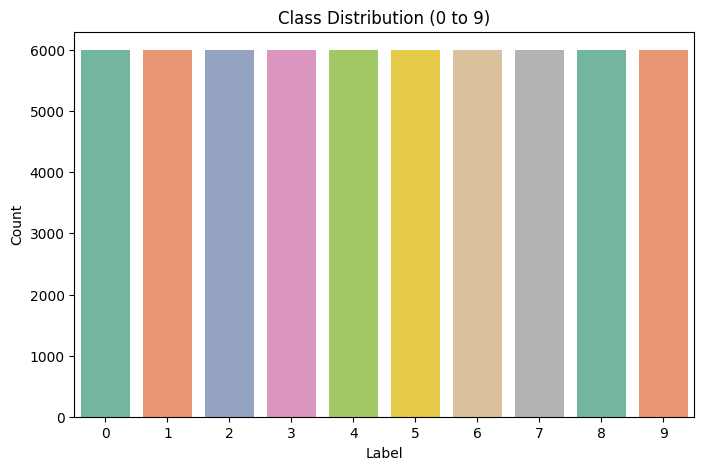

In [35]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_train, palette='Set2')
plt.title("Class Distribution (0 to 9)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

<ipython-input-39-31c85523ada1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_Test, palette='viridis')


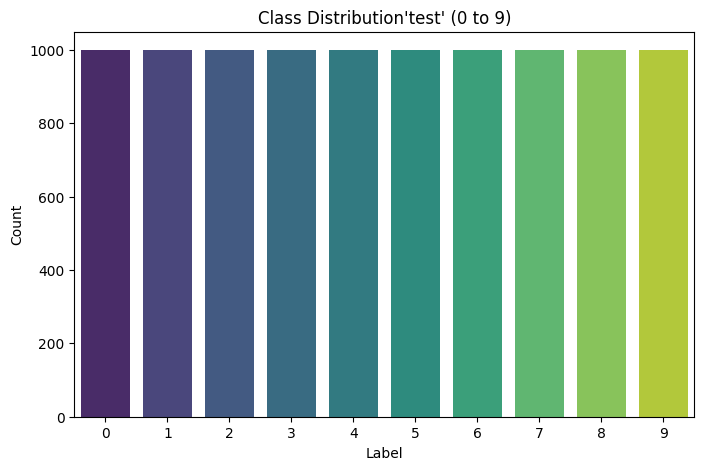

In [39]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df_Test, palette='viridis')
plt.title("Class Distribution'test' (0 to 9)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

**1.5 Separate Xtraun ytrain features and labels for other tasks **

In [45]:
y_train = df_train["label"]
X_train_df = df_train.drop("label", axis=1)
y_test = df_test["label"]
X_test_df = df_test.drop("label", axis=1)

**1.6 Normalizing data to 0-1 with minmaxscalar**

In [46]:
from sklearn.preprocessing import MinMaxScaler
# ساخت اسکیلر و نرمال‌سازی X_train
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_df)

# نرمال‌سازی X_test با همون
X_test_scaled = scaler.transform(X_test_df)


**1.7 chek normalization**

In [47]:
print(f"Train features shape: {X_train_scaled.shape}")
print(f"Test features shape: {X_test_scaled.shape}")
print(f"Train label shape: {y_train.shape}")
print(f"Test label shape: {y_test.shape}")

Train features shape: (60000, 784)
Test features shape: (10000, 784)
Train label shape: (60000,)
Test label shape: (10000,)


1.8

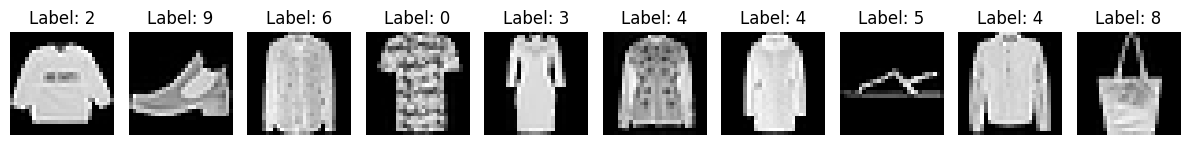

In [53]:
# Define the function to plot images from scaled data
def plot_images(data, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        image = data[i].reshape(28, 28)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Example usage for train images
plot_images(X_train_scaled, y_train.values)


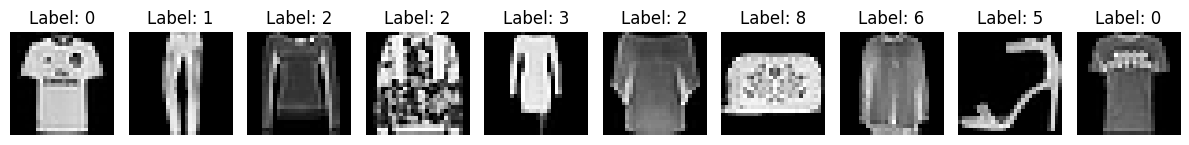

In [54]:
# Define the function to plot images from scaled data
def plot_images(data, labels, n=10):
    plt.figure(figsize=(12, 2))
    for i in range(n):
        image = data[i].reshape(28, 28)
        plt.subplot(1, n, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
# Example usage for train images
# برای نمایش 10 تصویر اول از داده تست
plot_images(X_test_scaled, y_test.values)

**applying and visualizing PCA for further steps(clustering)**

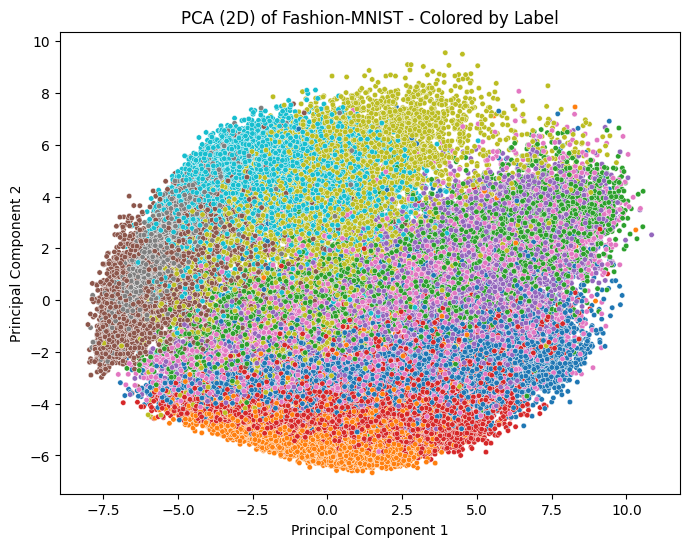

In [55]:
from sklearn.decomposition import PCA
# PCA برای کاهش ابعاد X_train_scaled به 2 تا مؤلفه
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# نمودار scatter از خروجی PCA با رنگ بر اساس برچسب کلاس
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="tab10", s=15, legend=False)
plt.title("PCA (2D) of Fashion-MNIST - Colored by Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
